In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB # 다항분포 나이브 베이즈 모델
from sklearn.metrics import accuracy_score #정확도 계산
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
from tensorflow import keras
from tqdm import tqdm
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN

In [3]:
import pandas as pd
data = pd.read_csv('C:/Users/trxgfcg/OneDrive/바탕 화면/big/Twiter.csv', encoding='latin1')

data

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56741,1,"you've gone and broke the wrong heart baby, an..."
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56743,1,youu got wild bitches tellin you lies


In [4]:
del data['Unnamed: 0']
data['Toxicity'] = data['Toxicity'].replace(['positive','negative'],[0,1])
data[:5]

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [5]:
import pandas as pd

# label 열의 값이 1인 행의 인덱스를 찾습니다.
indices_to_drop = data[data['Toxicity'] == 1].sample(frac=0.8, random_state=42).index

len(indices_to_drop)
# 인덱스를 기반으로 데이터프레임에서 해당 행을 삭제합니다.
data = data.drop(indices_to_drop)

print(data)


       Toxicity                                              tweet
0             0   @user when a father is dysfunctional and is s...
1             0  @user @user thanks for #lyft credit i can't us...
2             0                                bihday your majesty
3             0  #model   i love u take with u all the time in ...
4             0             factsguide: society now    #motivation
...         ...                                                ...
56726         1  you gotta understand that these bitches are ch...
56733         1  you look like your 12 stop talking about fucki...
56740         1  you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56742         1  young buck wanna eat!!.. dat nigguh like I ain...
56744         0  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...

[37423 rows x 2 columns]


In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd

# NLTK 데이터 다운로드
nltk.download('punkt')
nltk.download('stopwords')

# 영어 불용어 목록
stop_words = set(stopwords.words('english'))

# 데이터 로드 (예시로 DataFrame을 사용합니다)
# 여기서는 DataFrame의 'text' 열에 텍스트 데이터가 있다고 가정합니다.
# 실제 데이터에 맞게 수정해야 합니다.
# 예시: df = pd.read_csv('your_dataset.csv')
# 데이터프레임의 'text' 열에 텍스트 데이터가 들어있다고 가정
# df['text']에 해당하는 컬럼명을 사용하세요.

# 예시 데이터


# 데이터프레임 생성 (실제 데이터에 맞게 수정해야 함)
df = pd.DataFrame(data, columns=['tweet'])

# 불용어 제거 함수 정의
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_text = [word for word in tokens if word.lower() not in stop_words]
    return " ".join(filtered_text)

# 각 텍스트에 대해 불용어 제거 적용
df['tweet'] = df['tweet'].apply(remove_stopwords)

# 결과 출력
print(df)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\trxgfcg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\trxgfcg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                   tweet
0      @ user father dysfunctional selfish drags kids...
1      @ user @ user thanks # lyft credit ca n't use ...
2                                         bihday majesty
3      # model love u take u time urÃ°ÂÂÂ± ! ! ! Ã°...
4                      factsguide : society # motivation
...                                                  ...
56726                 got ta understand bitches childish
56733  look like 12 stop talking fucking bitches & # ...
56740  's muthaf * * * lie & # 8220 ; @ LifeAsKing : ...
56742  young buck wan na eat ! ! .. dat nigguh like a...
56744  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...

[37423 rows x 1 columns]


In [7]:
data['tweet'] = df

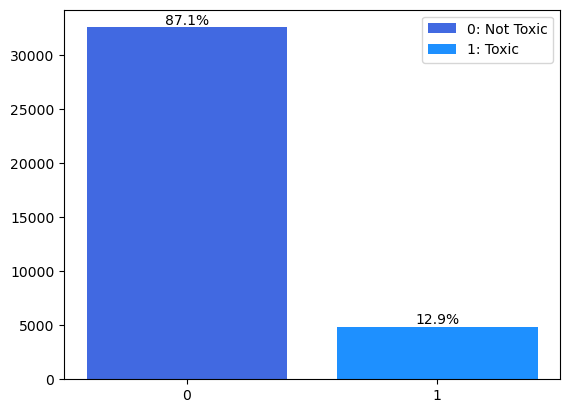

In [8]:
# 막대 그래프 그리기
total_count = data['Toxicity'].count()
bars = plt.bar([0, 1], data['Toxicity'].value_counts().values, color=['#4169E1', '#1E90FF'])

# x축 눈금과 레이블 설정
plt.xticks([0, 1], ['0', '1'])

# 범례 추가
plt.legend(bars, ['0: Not Toxic', '1: Toxic'])
for bar in bars:
    height = bar.get_height()
    percentage = height / total_count * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%.1f%%' % percentage, ha='center', va='bottom')

plt.savefig('C:/Users/trxgfcg/OneDrive/바탕 화면/학위논문_배경득/Tweet_ratio.png')
# 그래프 표시
plt.show()


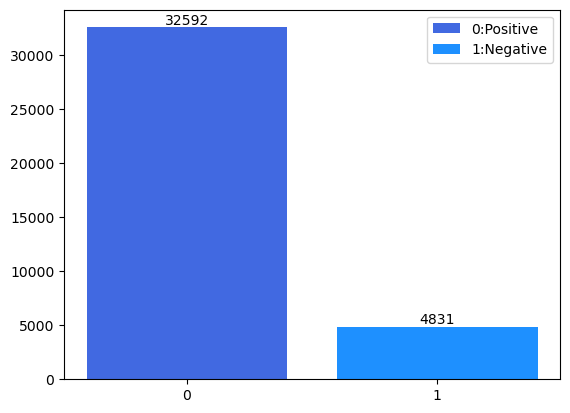

In [9]:
import matplotlib.pyplot as plt

# 데이터프레임에서 'Toxicity' 칼럼의 값에 따른 갯수를 세기
toxicity_counts = data['Toxicity'].value_counts()

# 전체 데이터 갯수
total_count = toxicity_counts.sum()

# 막대 그래프 그리기
bars = plt.bar([0, 1], toxicity_counts.values, color=['#4169E1', '#1E90FF'])

# x축 눈금과 레이블 설정
plt.xticks([0, 1], ['0', '1'])

# 범례 추가
plt.legend(bars, ['0:Positive', '1:Negative'])

# 각 막대 위에 데이터 갯수 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % height, ha='center', va='bottom')
# 그래프 표시
plt.show()


In [44]:
#data = pd.read_csv('C:/Users/trxgfcg/OneDrive/바탕 화면/big/IMDB.csv', encoding='latin1')


In [45]:
print('v2열의 유니크한 값 :',data['tweet'].nunique())

v2열의 유니크한 값 : 35132


In [46]:
data.drop_duplicates(subset=['tweet'], inplace=True)
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 35132


In [47]:

#real = pd.read_csv('C:/Users/trxgfcg/OneDrive/바탕 화면/big/review_realtotal.csv')

In [48]:
#print('v2열의 유니크한 값 :',real['element_text'].nunique())

In [49]:
#real.drop_duplicates(subset=['element_text'], inplace=True)
#print('총 샘플의 수 :',len(real))

In [50]:
X_data = data['tweet']
y_data = data['Toxicity']
print('메일 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))


메일 본문의 개수: 35132
레이블의 개수: 35132


In [51]:
x_train, x_valid, y_train, y_valid= train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [52]:
x_train.fillna('', inplace=True)

In [53]:
dtmvector = CountVectorizer()
X_train_dtm = dtmvector.fit_transform(x_train)
print(X_train_dtm.shape)

(28105, 43272)


In [54]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(X_train_dtm)
print(tfidfv.shape)

(28105, 43272)


In [55]:
mod = MultinomialNB()
orginal = mod.fit(tfidfv, y_train)

In [56]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

In [57]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# 결측치를 빈 문자열로 대체
x_valid.fillna('', inplace=True)

# CountVectorizer로 변환
X_test_dtm = dtmvector.transform(x_valid)
tfidfv_test = tfidf_transformer.transform(X_test_dtm)

predicted = mod.predict(tfidfv_test)  # 테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_valid, predicted)) #예측값과 실제값 비교

정확도: 0.9008111569659883


In [58]:
from sklearn.metrics import f1_score

original_f1 = f1_score(y_valid, predicted)

print("F1-score:", original_f1)

F1-score: 0.4650805832693784


In [59]:
original_f1 = f1_score(y_valid, predicted)
print(f"F1-score={original_f1}")

F1-score=0.4650805832693784


In [60]:
df_test = pd.concat([x_valid, y_valid], axis=1)

In [61]:
df_train = pd.concat([x_train, y_train], axis=1)

In [62]:
def print_class_num(df, label_name):            # 이진 클래스의 비율을 알아보기 위한 함수
  n_total = len(df)                             # 데이터의 총 개수
  n_neg = len(df.query(label_name + ' == 1'))   # label로 사용하는 열의 1 개수
  n_pos = len(df.query(label_name + ' == 0'))   # label로 사용하는 열의 0 개수

  print("부정 댓글: {}개, {:.2f}%".format(n_neg, n_neg*100/n_total))
  print("긍정 댓글: {}개, {:.2f}%\n".format(n_pos, n_pos*100/n_total))

  values = df[label_name].value_counts()        # label로 사용하는 열의 값을 카운트
  values.plot(kind='bar')
  print(values)

In [63]:
df_test

,tweet,Toxicity
21581,way treat fairuse policy . # wtfu,0
11409,dale carnegie 's principle # success `` make p...,0
16279,@ user lozza Ã°ÂÂÂ¹Ã°ÂÂÂ¦Ã¢ÂÂÃ¯Â¸Â @ us...,0
9963,@ user selfie sunday Ã¢ÂÂÃ°ÂÂÂ¼Ã¯Â¸ÂÃ°ÂÂ...,0
52919,chill hoe,1
...,...,...
26230,thanks # oitnb making emotional . wo n't post ...,0
21493,@ user yes sadly easy wins awhile # albest,0
19785,happiness thought away # loa # feelgood # live...,0
22692,bother giving false hope 's really nothing ? #...,0


In [64]:
from imblearn.over_sampling import ADASYN
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

Amodels = []
f1_scores_A = [] 
# 테스트 데이터를 TF-IDF로 변환
X_test_dtm = dtmvector.transform(x_valid)
tfidfv_test = tfidf_transformer.transform(X_test_dtm)

# ADASYN을 사용하여 오버샘플링하고 정확도 측정
for i in range(3, 11):
    # ADASYN을 사용하여 오버샘플링
    adasyn = ADASYN(sampling_strategy=i/10)
    X_train_adasyn, y_train_adasyn = adasyn.fit_resample(tfidfv, y_train)

    # 모델 학습
    mod = MultinomialNB()
    mod.fit(X_train_adasyn, y_train_adasyn)
    
    #모델추가
    Amodels.append(mod)

    # 예측
    predicted = mod.predict(tfidfv_test)

    # F1-score 출력
    f1 = f1_score(y_valid, predicted)
    f1_scores_A.append(f1)
    print(f"sampling_strategy={i/10}: F1-score={f1}")


sampling_strategy=0.3: F1-score=0.7619610159480212
sampling_strategy=0.4: F1-score=0.8163693599160546
sampling_strategy=0.5: F1-score=0.8192771084337349
sampling_strategy=0.6: F1-score=0.8121974830590512
sampling_strategy=0.7: F1-score=0.7852318775326429
sampling_strategy=0.8: F1-score=0.7916477530640036
sampling_strategy=0.9: F1-score=0.7578947368421053
sampling_strategy=1.0: F1-score=0.7280032141422259


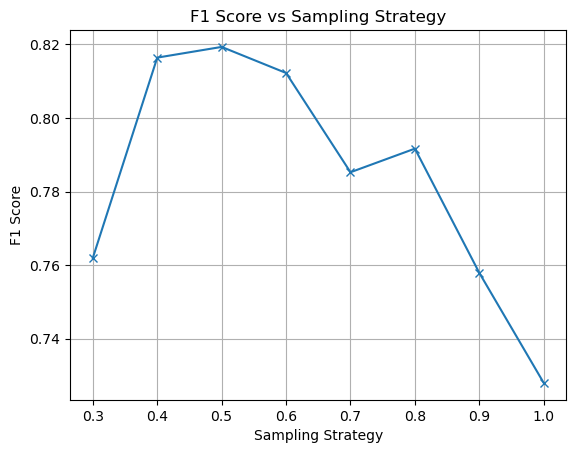

In [65]:
import matplotlib.pyplot as plt

sampling_strategies = [i/10 for i in range(3, 11)]
plt.plot(sampling_strategies, f1_scores_A, marker='x')
#plt.plot(sampling_strategies, f1_scores_B, marker='x')
#plt.plot(sampling_strategies, f1_scores_S, marker='x')

#plt.plot(sampling_strategies, f1_scores_A, marker='o')
plt.title('F1 Score vs Sampling Strategy')
plt.xlabel('Sampling Strategy')
plt.ylabel('F1 Score')
plt.grid(True)
#plt.ylim(0.91, 0.96)

plt.show()


In [66]:
from imblearn.over_sampling import ADASYN
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

f1_scores_S = [] 
# 테스트 데이터를 TF-IDF로 변환
X_test_dtm = dtmvector.transform(x_valid)
tfidfv_test = tfidf_transformer.transform(X_test_dtm)

Smodels = []

# ADASYN을 사용하여 오버샘플링하고 정확도 측정
for i in range(3, 11):
    # ADASYN을 사용하여 오버샘플링
    smote = SMOTE(sampling_strategy=i/10)
    X_train_smote, y_train_smote = smote.fit_resample(tfidfv, y_train)

    # 모델 학습
    mod = MultinomialNB()
    mod.fit(X_train_smote, y_train_smote)
    # 생성된 모델을 리스트에 추가
    Smodels.append(mod)

    # 예측
    predicted = mod.predict(tfidfv_test)


   # F1-score 출력
    f1 = f1_score(y_valid, predicted)
    f1_scores_S.append(f1)
    print(f"sampling_strategy={i/10}: F1-score={f1}")


sampling_strategy=0.3: F1-score=0.7525464349910126
sampling_strategy=0.4: F1-score=0.8076712328767124
sampling_strategy=0.5: F1-score=0.8232271325796505
sampling_strategy=0.6: F1-score=0.815068493150685
sampling_strategy=0.7: F1-score=0.7973795039775387
sampling_strategy=0.8: F1-score=0.7821826280623607
sampling_strategy=0.9: F1-score=0.7563884156729132
sampling_strategy=1.0: F1-score=0.7420553033429632


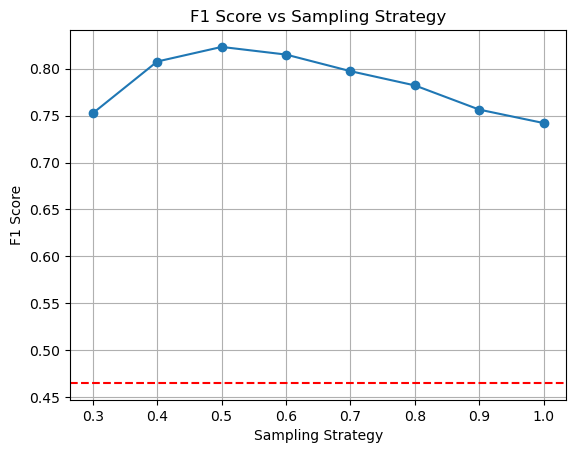

In [67]:
import matplotlib.pyplot as plt

sampling_strategies = [i/10 for i in range(3, 11)]

plt.plot(sampling_strategies, f1_scores_S, marker='o')
plt.title('F1 Score vs Sampling Strategy')
plt.xlabel('Sampling Strategy')
plt.ylabel('F1 Score')
plt.grid(True)

#plt.ylim(0.9, 0.96)
plt.axhline(y=original_f1, color='r', linestyle='--')

plt.show()


In [68]:
from imblearn.over_sampling import ADASYN
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
f1_scores_B = [] 
Bmodels = [] 

# 테스트 데이터를 TF-IDF로 변환
X_test_dtm = dtmvector.transform(x_valid)
tfidfv_test = tfidf_transformer.transform(X_test_dtm)

# ADASYN을 사용하여 오버샘플링하고 정확도 측정
for i in range(3, 11):
    # ADASYN을 사용하여 오버샘플링
    Bsmote = BorderlineSMOTE(sampling_strategy=i/10)
    X_train_B, y_train_B = Bsmote.fit_resample(tfidfv, y_train)

    # 모델 학습
    mod = MultinomialNB()
    mod.fit(X_train_B, y_train_B)
    # 생성된 모델을 리스트에 추가
    Bmodels.append(mod)

    # 예측
    predicted = mod.predict(tfidfv_test)

    # F1-score 출력
    f1 = f1_score(y_valid, predicted)
    f1_scores_B.append(f1)
    print(f"sampling_strategy={i/10}: F1-score={f1}")


sampling_strategy=0.3: F1-score=0.7595238095238096
sampling_strategy=0.4: F1-score=0.8085339168490153
sampling_strategy=0.5: F1-score=0.8177545691906005
sampling_strategy=0.6: F1-score=0.8140454995054401
sampling_strategy=0.7: F1-score=0.8036138849262957
sampling_strategy=0.8: F1-score=0.7942936033133916
sampling_strategy=0.9: F1-score=0.7757092198581561
sampling_strategy=1.0: F1-score=0.7562018819503848


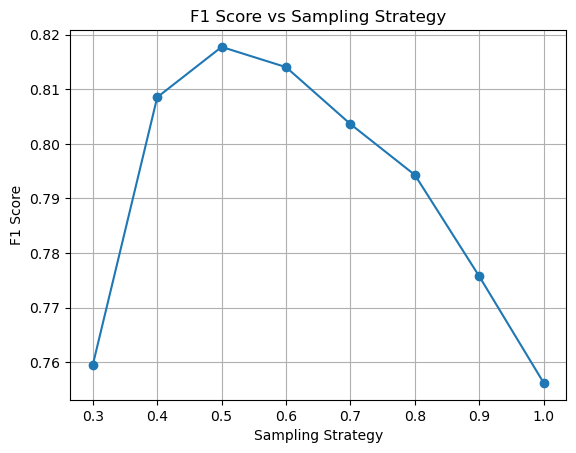

In [69]:
import matplotlib.pyplot as plt

sampling_strategies = [i/10 for i in range(3, 11)]

plt.plot(sampling_strategies, f1_scores_B, marker='o')
plt.title('F1 Score vs Sampling Strategy')
plt.xlabel('Sampling Strategy')
plt.ylabel('F1 Score')
plt.grid(True)

#plt.ylim(0.9, 0.96)
#plt.axhline(y=original_f1, color='r', linestyle='--')

plt.show()


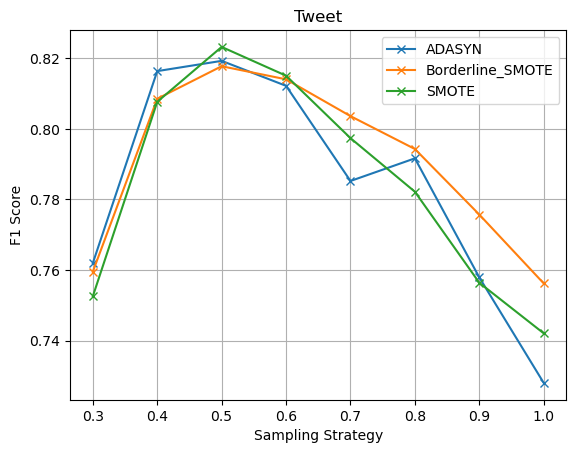

In [70]:
import matplotlib.pyplot as plt

sampling_strategies = [i/10 for i in range(3, 11)]
plt.plot(sampling_strategies, f1_scores_A, marker='x',label='ADASYN')
plt.plot(sampling_strategies, f1_scores_B, marker='x',label='Borderline_SMOTE')
plt.plot(sampling_strategies, f1_scores_S, marker='x',label='SMOTE')

#plt.plot(sampling_strategies, f1_scores_A, marker='o')
plt.title('Tweet')
plt.xlabel('Sampling Strategy')
plt.ylabel('F1 Score')
plt.grid(True)
#plt.ylim(0.91, 0.96)
plt.legend()
#plt.axhline(y=0.675, color='r', linestyle='--')
#plt.text(0.5, 0.68, 'Original F1-score : '+str(round(original_f1,3)), color='red', fontsize=11)
plt.savefig('C:/Users/trxgfcg/OneDrive/바탕 화면/학위논문_배경득/Tweetdata_result_no.png')
plt.show()


In [71]:
orginal_f1

NameError: name 'orginal_f1' is not defined